# Bayesian Classifier
In this lab, you will implement and assess the performance of the Bayesian Classifier.

## Lab Instructions:
1. Read the explanation above each requirement very well
2. Read the requirement very well before jumping into the code.
3. Some requirements have essay questions in them, make sure you do NOT miss them.
4. PLEASE Read the hints! They are clear and made to help you complete the requirement as fast as you should 

In [332]:
#### always keep all your imports in the first cell ####
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv
import math
import pandas as pd

%matplotlib qt

## Requirement

In this requirement, you will build the Bayesian Classifier and test its performance. 

You are provided with a data file **data1.csv** containing list of points and their corresponding classes. The format of the data files is shown in the table below.

| |Class|Feature 1|Feature 1| 
|-|-|-|-|
|Point#1|1|0.271633|-2.93224|
|Point#2|1|7.020786|-1.98966|
|Point#3|1|2.901827|-0.91291|


You are also provided with a test data file **test_data.csv**. The file contains test points that are unlabelled (i.e. the class to which they belong is unknown).

In [333]:
# TODO [1] : Read the file 'data1.csv' into the variable data.
# data contains the training data together with labelled classes.
def read_data(file_name):
    ## HINT 1: How is the data ordered in the file?
    ## HINT 2: Do you need to cast the data you read from the file? -> I don't undetstand this question
    data = pd.read_csv(file_name, sep = ',', header=None)
    return data

In [334]:
def read_test_data():
    
    # TODO [2.A]: Read the file 'test_data.csv' into the variable test_data
    # test_data contains the unlabelled test class.
    ## HINT: Do you need to cast the data you read from the file?

    test_data = read_data('test_data.csv')
    
    # TODO [2.B]: Read the file 'test_data_true.csv' into the variable test_data_true
    # test_data_true contains the actual classes of the test instances, which you will compare
    # against your predicted classes.
    ## HINT: Do you need to cast the data you read from the file?

    test_data_true = read_data('test_data_true.csv')
    return test_data, test_data_true

### Machine Learning Terminlology
Machine learning problems use common termonology (names and notiations) to refer to certain things. It is useful to use this termonology throughout your code to make it readable.

| | |
|:-|:--- |
|$M$:|A scalar; represents the number of training points in the training set.|
|$K$:|A scalar; represents the number of test points in the test set.|
|$N$:|A scalar; represents the number of features of training set/test set (dimensionality of data).|
|$X$:|A numpy array of shape $(M \times N)$ containing the training data **without** its labels, where $M$ is the number of training points and $N$ is the number of features in the dataset (or dimensionality of features). <br/> Each element in $X$ is a tuple $(X_1, X_2, \dots, X_N)$ where $N$ is the number of features in the dataset.| 
|$X_{test}$:| A numpy array of shape $(K \times N)$ containing the test data, where $K$ is the number of test points and $N$ is the number of features in the dataset (or dimensionality of features). <br/> Each element in $X_{test}$ is a tuple $(X_1, X_2, \dots, X_N)$ where $N$ is the number of features in the dataset. <br/> The number of columns in $X_{test}$ is equal to the number of columns in $X$ (because they have the same number of features). However, the number of rows in $X_{test}$ is different to the number of rows in $X$.|
|**$Y$:| A numpy array of shape $(M \times 1)$ containing the labels of the training data. Each row in $Y$ corresponds to the label of the training point in $X$.<br/> For example, $Y[j]$ corresponds to the label of the training point $X[j]$ where $0<=j<M$.|



### NOTE
> while getting the value of N, we subtract 1, this is because our training data consists of 3 columns, one of them is the class of each 2 features, so we wanna neglect this column as we are just interested in the number of features. 

In [335]:
# TODO [3]: Fill the values of M, K, N, X, XTest, and Y respectively.
# Do not fill them manually (i.e. do not set N = 3). They should be generic for any input file.  
training_data = read_data('data1.csv')
test_data, test_data_true = read_test_data()

numClasses = 3 
M = training_data.shape[0] # number of training instances 
N = training_data.shape[1] -1  # number of features.
K = test_data.shape[0] # number of test points -> homa dol el ana bdkhlhom 3la el model
X = np.array(training_data.iloc[:,1:]) # training data
X_Test = np.array(test_data.iloc[:,:]) # test data
Y = np.array(training_data.iloc[:,:1]) # labels of the training data

In [336]:
# TODO [4]: Draw a scatter plot for traning data, where each class is coloured by the colour corresponding 
#           to its index in the colors array.
# Class 1 should be coloured in red, Class 2 should be coloured in green, and Class 3 should be coloured in blue.
# Hint: We have done a similar plot in the previous lab. What operation do we need to select training data 
#       belonging to a certain class?

colors = ['r', 'g', 'b']

for i in range(0,3):
    # the condition here is that we plot depending on the label, Y contains our labels, so, if Y[:, 0] == 1 for example,
    # then this means that we are plotting the fisrt class.
    # the scatter function takes the x and y coordinates, which in our data are the elements in the X matrix, so 
    # on x axis we plot the first column of X, and on the y axis we plot the second column of X.
    plt.scatter (X[Y[:,0]==i + 1,0], X[Y[:,0]==i + 1,1], c=colors[i], label='Class' + str(i+1))
plt.legend()
plt.show()
    


### Scatter plot for our trainning data: 
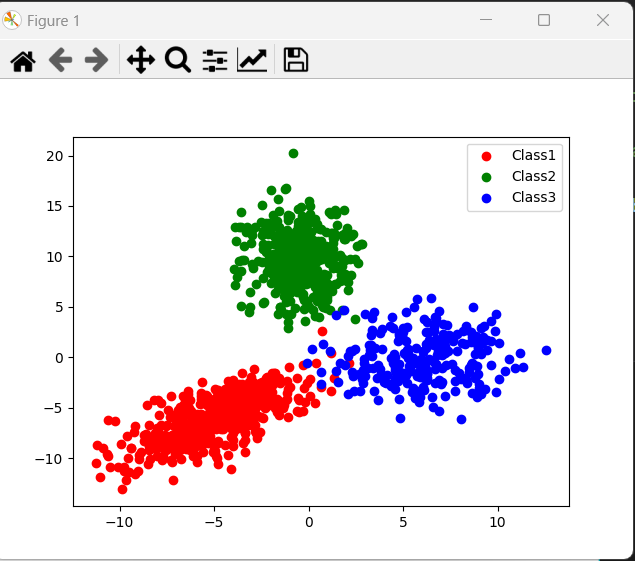

#### What do you notice about the plot? (Write everything you can think of)
1. the data is not too much noisy. 
2. the data is not linearly separable. ( or we can say to separate them we need to use 2 lines.)
    one horizontal line, so if the data is above the line we can classify it as class 2, and then we need another line
    which will be separating the red from the green and blue \ then if the data is on the left of that line, we can classify
    it as class 1, and if it is on the right of that line, we can classify it as class 3.
3. the data is not balanced, as the probabilty of getting class 1 is highest probabilty then class  2 then class 3 with the least probabilty.
4. the data is not too much skewed, as we can see that the data of class 1 is not skewed to the left or right,       and the same for class 2 and 3
5. no outliers, as we can see that the data is not too much spreaded, and the data is not too much far from the mean.

----    
### Bayesian Classifier
The Bayesian Classifier calculates the probability of the test point belonging to each class, then the class with highest probability is assigned to the test point.

Classification of $x_{test}$ = $argmax_{i} P\big(C_i|x_{test}\big)$ = $argmax_{i} P(x|C_i) * P(C_i)$

* $P(C_i|x_{test})$: Posterior probability
* $P(x|C_i)$: Class-conditional probability (or distribution)
* $P(C_i)$: Class apriori probability
                
**Note that** $P(C_i|x_{test}) \neq P(x_{test}|C_i) * P(C_i)$. Instead,  $P(C_i|x_{test}) = \frac{P(x_{test}|C_i) * P(C_i)}{P(x_{test})}$. However, when we compare multiple classes, the denominator $P(x_{test})$ is independent of the class $i$ and can be regarded as normalizing factor.

**We start by** computing statistical parameters about each class from the data. 

For each class, we are interested in **three** parameters that will be used for calculating the Gaussian class-conditional distribution and the posterior probability.

These parameters are:

|||
|:-|:-|
|**Class Apriori Probability: ($P_C$)**| A scalar; the probability of class occurence (how frequent this class appears in the training data)|
|**Class Mean: ($\mu$)**| A vector of shape $(N \times 1)$, it is the expected value (mean) calculated from the training points of each class.|
|**Class Covariance Matrix: ($\Sigma$)**| A square symmetric matrix of shape $(N \times N)$ representing the covariances between all the feature calculated from the training points of the class. <br/> For example: Matrix element $\sigma^2_{12}$ is the covariance between the 1st and the 2nd features|



------- 
## **__Algorithms__** 

#### 1. Evaluating the probability of each class
1.  to evaluate the probability so we will iterate over the Y(which contains the label for the classes.)
2. if it was == 1 so we will increment the sum of class1 and so on
3. finally we will divide by M (which is the number of the training data)
#### 2. Evaluating the mean of each class. 
1. iterate over Y and if it was equal to the classIndex(the loop index) then we have the same index in the X, so we will sum the values in each feature, and then divide by the number of elements in each class. 
#### 3. Evaluating the covariance
1. iterating over each class
2. getting the covariance of each feature with respect to the other one.   

In [337]:
pClasses = [] # A list of size (numClasses, 1) containing the a priori probabilities of each class in the training set.

estimate_means = [] # A numpy array of size (numClasses, N) containing the mean points of each class in the training set. 
                    # HINT: USE NP.MEAN

estimate_covariances = [] # A numpy array of size (numClasses, N, N) containing the covariance matrices of each class in the training set.
                          # HINT: USE NP.COV (Pay attenention for what it takes as an argument)

#separating the features out to simplify the logic in the loop. 
classFeatures =[]
for i in range (numClasses): # O(numOfClasses)
    classFeatures.append(X[Y[: , 0] == i+1]) # for all rows get me the first column, this will put all the features of the same class together. 
classFeatures = np.array(classFeatures)


# Separating the features depending on the class -> this is better for you to avoid ambiguity during the implementation
X_C1 = X[Y[:,0] == 1][:, :]  # ? This is X given that its the first class
X_C2 = X[Y[:,0] == 2][:, :]  # ? This is X given that its the second class
X_C3 = X[Y[:,0] == 3][:, :]  # ? This is X given that its the third class

# creating a list of all the classes to facilitate the implementation during loops.
X_of_all_classes = [X_C1, X_C2, X_C3]
for classIndex in range(numClasses):
    # TODO [5]: Estimate the parameters of the Gaussian distributions of the given classes.
    # Fill pClasses, estimate_means, and estimate_covariances in this part 
    # Your code should be vectorized WITHOUT USING A SINGLE FOR LOOP. 
    pClasses.append(np.round(np.sum (Y == classIndex +1) / M, 4)) # we use round here to avoid the floating point error, and we use 8 digits after the floating point.
    # estimate_means.append((np.sum(classFeatures[classIndex][0]) / classFeatures[classIndex][0].shape[0],
    #                                             np.sum(classFeatures[classIndex][1]) / classFeatures[classIndex][1].shape[0]))
    # estimate_covariances.append(np.cov(classFeatures[classIndex], rowvar=False)) # or we can use the Transpose and use rowvar el True, same operation :()
    # estimate_covariances.append(np.cov(classFeatures[classIndex].T, rowvar=True)) # or we can use the Transpose and use rowvar el True, same operation :()
    X_C = X_of_all_classes[classIndex]
    estimate_means.append([np.mean(X_C[:,0]), np.mean(X_C[:,1])]) #* get mean of each feature with respect to each class
    estimate_covariances.append(np.cov(X_C.T)) #* get covariance matrix for each class
    
estimate_means = np.array(estimate_means)
estimate_covariances = np.array(estimate_covariances)

C:\Users\20115\AppData\Local\Temp\ipykernel_3240\2295181856.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  classFeatures = np.array(classFeatures)


## numpy.cov ()
**Syntax:**
> numpy.cov(m, y=None, rowvar=True, bias=False, ddof=None, fweights=None, aweights=None, *, dtype=None)

**Functionality:**
Estimate a covariance matrix, given data and weights.

Covariance indicates the level to which two variables vary together. If we examine N-dimensional samples, X = [x1, x2, ... , xn]^(T) 
, then the covariance matrix element Ci,j is the covariance of Xi and Xj. The element Ci,i is the variance of Xi.

See the notes for an outline of the algorithm.

Parameters:

    m: array_like

        A 1-D or 2-D array containing multiple variables and observations. Each row of m represents a variable, and each column a single observation of all those variables. Also see rowvar below.
    y: array_like, optional

        An additional set of variables and observations. y has the same form as that of m.
    rowvarbool, optional

        If rowvar is True (default), then each row represents a variable, with observations in the columns. Otherwise, the relationship is transposed: each column represents a variable, while the rows contain observations.
    biasbool, optional

        Default normalization (False) is by (N - 1), where N is the number of observations given (unbiased estimate). If bias is True, then normalization is by N. These values can be overridden by using the keyword ddof in numpy versions >= 1.5.


In [338]:
### Test your implementation ###
### DO NOT CHANGE THIS CODE ###
assert len(pClasses) == numClasses,\
        'Incorrect class apriori probability list, it should be of length {}'.format(len(pClasses))
assert np.sum(pClasses)==1,\
        'Sum of apriori probabilities should be 1, found {}'.format(np.sum(pClasses))

assert estimate_means.shape == (numClasses, N),\
        'Incorrect estimated means, it should be of shape {}, but found {}'.format((numClasses, N), estimate_means.shape)
assert estimate_covariances.shape == (numClasses, N, N),\
        'Incorrect estimate covariance matrices, it should be of shape {}'.format((numClasses, N, N))

**The second step** in the classifier is to calculate the class-conditional density using the Gaussian destribution:

$P(x|C_i) = \mathcal{N}(x; \mu_i, \Sigma_i) = \frac{1}{(2\pi)^{\frac{N}{2}}|\Sigma_i|^{\frac{1}{2}}} exp\big(\frac{-1}{2}(x-\mu_i)^T\Sigma^{-1}_{i}(x-\mu_i)\big)$

### Parameters are: 
1. N -> number of features. 
2. x -> our features vector
3. u[i] -> the mean of each feature
4. Sigma(summation symbol) -> the covariance matrix

In [339]:
# TODO 6: Implement the multivariate normal gaussian distribution with parameters mu and sigma, and return the
#  value in prob.
def multivariate_normal_gaussian(X, mu, sigma):
    prob = (1/ ((2 * np.pi)**(len(X)/2) * np.linalg.det(sigma)**(1/2))) * np.exp(-1/2 * (X-mu).T @ np.linalg.inv(sigma) @ (X-mu)) # @ is the matrix multiplication
    return prob

1. linalg -> linear algebra 
2. @ -> matrix multiplication
3. linalg.inv -> inverse matrix
4. linalg.det -> determinant of the matrix

In [340]:
### Test your implementation ###
### DO NOT CHANGE THIS CODE ###
np.random.seed(90)
assertion_x = np.random.rand(3).reshape(-1,1)
assertion_mu = np.random.rand(3).reshape(-1,1)
assertion_sigma = np.random.rand(9).reshape(3,3)
assertion_probability = multivariate_normal_gaussian(assertion_x, assertion_mu, assertion_sigma)[0][0]
assertion_probability = round(assertion_probability, 1)

assert assertion_probability == 7.8,\
    f'Incorrect Gaussian Probability calculated {assertion_probability}'

**The final step** is to go for each test point, calculate its posterior probability against each class, then classify it to the class with the highest posterior probability.

In [341]:
def bayes_rule(C, X, estimate_covariances, estimate_mean, pClasses):
    class_conditional = multivariate_normal_gaussian(
        X, estimate_mean[C], estimate_covariances[C])  # ? P(x|Ci)

    prior = pClasses[C]  # ? get prior probabilities P(Ci)
    # ? get posterior probabilities P(Ci|xtest)=P(x|Ci)*P(Ci)
    posterior = class_conditional*prior
    return posterior

    #! since P(Xtest) is independent of classes so we assume that is a normalization factor

In [342]:
# # TODO [7]: Apply the Bayesian Classifier to predict the classes of the test points.
predicted_classes = [] # predicted_classes: A numpy array of size (K, 1) where K is the number of points in the test set. Every element in this array
                       # contains the predicted class of Bayes classifier for this test point.

for i in range(X_Test.shape[0]):
    print("For test point:", X_Test[i])
    # TODO [7.A]: Compute the probability that the test point X_Test[i] belongs to each class in numClasses.
    classProbabilities = []
    #  Fill the array classProbabilities accordingly.
    classProbabilities.append([multivariate_normal_gaussian(X_Test[i], estimate_means[j], estimate_covariances[j]) * pClasses[j] for j in range(numClasses)])
    # TODO [7.B]: Find the prediction of the test point X_Test[i] and append it to the predicted_classes array.
    predicted_classes.append(np.argmax(classProbabilities) + 1)

    print('Class Probabilities: ', classProbabilities)  # the first class is the left most in the scatter plot
    print("Predicted class is :", predicted_classes[i])
    print("******************************************************************************")


For test point: [10.70141426  3.87253627]
Class Probabilities:  [[2.6567800477433983e-12, 2.14583718869893e-17, 0.000249138498539798]]
Predicted class is : 3
******************************************************************************
For test point: [-3.81831787 -5.00977814]
Class Probabilities:  [[0.015406376967493866, 1.5972185679050653e-10, 1.946147810890749e-07]]
Predicted class is : 1
******************************************************************************
For test point: [-3.57071936  9.96036181]
Class Probabilities:  [[7.934939977266547e-20, 0.0013654653546115115, 5.387392219521586e-11]]
Predicted class is : 2
******************************************************************************
For test point: [ 4.94309043 -0.01539406]
Class Probabilities:  [[1.957765795849759e-06, 1.9423184030145205e-08, 0.0056949321180719955]]
Predicted class is : 3
******************************************************************************
For test point: [ 4.26082551 -0.61349358]
Class 

### Accuracy Algorithm:
1. comparing the predicted class with the actual class(test_data_true)
2. if you found difference, increment counter
3. divide the counter by the total number of tests.
4. multiply by 100 to evalute the percentage. 

In [343]:
# TODO [8]: Compute the accuracy of the generated Bayesian classifier 
# WITHOUT USING ANY FOR LOOPs.
# reshaping test data true to be similar to the predicted classes to can compare them
test_data_true = np.array(test_data_true)
test_data_true = test_data_true.reshape(-1)
test_data_true = test_data_true.T
# comparing the two matrices and getting the accuracy
accuracy = np.sum(predicted_classes == test_data_true) / test_data_true.shape[0]
print('Accuracy = ' + str(round(accuracy,4) * 100) + '%')

Accuracy = 95.56%


In [344]:
# TODO [9]: Generate a 3D-plot for the generated distributions. x-axis and y-axis represent the features of the data, 
#           where z-axis represent the Gaussian probability N at this point.

x = np.linspace(-10, 10, 300)
y = np.linspace(-10, 15, 300)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z1 = np.zeros(X.shape)
Z2 = np.zeros(X.shape)
Z3 = np.zeros(X.shape)

for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        #? TODO [9]: Fill in the matrix Z which will represent the probability distribution of every point.
        # Z[i,j] represents the joint probability N(x,y) for x = i and y = j. 
        # We want to draw the gaussian probability N(x,y) for all points. 
        Z1[i,j] = multivariate_normal_gaussian(np.array([X[i,j], Y[i,j]]), estimate_means[0], estimate_covariances[0])
        Z2[i,j] = multivariate_normal_gaussian(np.array([X[i,j], Y[i,j]]), estimate_means[1], estimate_covariances[1])
        Z3[i,j] = multivariate_normal_gaussian(np.array([X[i,j], Y[i,j]]), estimate_means[2], estimate_covariances[2])
        Z[i,j] = max (Z1[i,j], Z2[i,j], Z3[i,j])
# Make a 3D plot, do not change code
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

C:\Users\20115\AppData\Local\Temp\ipykernel_3240\3043647715.py:23: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


### Top view
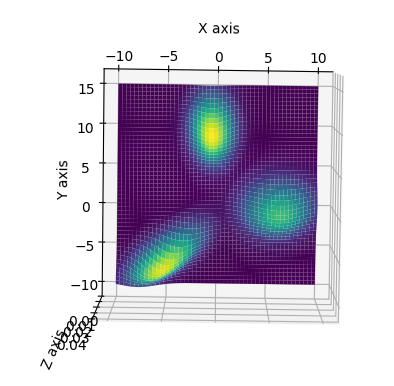

### Side view
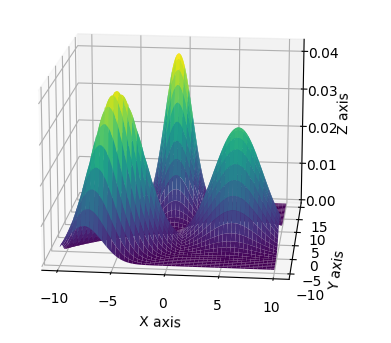

### scatter plot
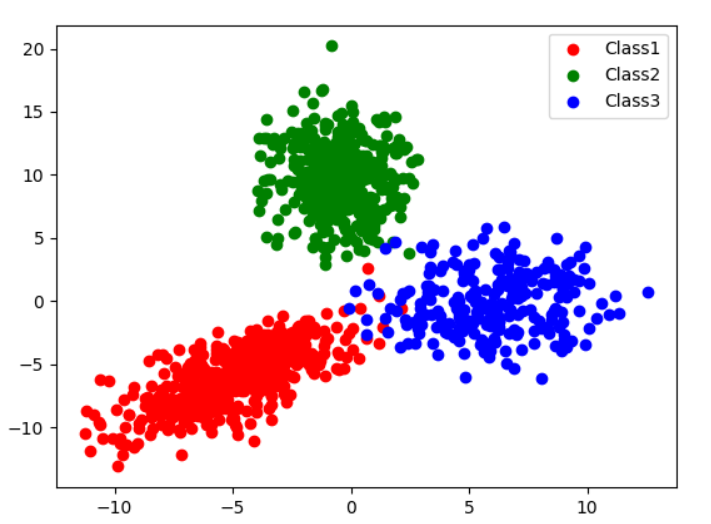

### How can you judge your plot is correct?

1. you have to have 3 peaks, since you have 3 classes. 
2. the peaks should be in the same place as the mean of the class.
3. the peaks should be in the same shape as the covariance matrix of the class, (so they should be ellipses, and the angle
of the ellipse should be the same as the angle of the covariance matrix, either +ve, -ve.)
4. the peaks should be in the same height as the probability of the class.
5. the 3d plot should look like the scatter plot